In [1]:
import tensorflow as tf
import glob
import fnmatch
import numpy as np
from numpy import linalg as LA

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()


In [4]:
tf.__version__

'2.1.0'

In [26]:
files = glob.glob('/scratch0/ilya/locDoc/tfgan/imagenet128_baseline/*1160000*')

In [27]:
files

['/scratch0/ilya/locDoc/tfgan/imagenet128_baseline/model.ckpt-1160000.data-00000-of-00001',
 '/scratch0/ilya/locDoc/tfgan/imagenet128_baseline/model.ckpt-1160000.index',
 '/scratch0/ilya/locDoc/tfgan/imagenet128_baseline/model.ckpt-1160000.meta']

In [20]:
configfiles = fnmatch.filter(files, '*.meta')

In [31]:
graphpbtxt = '/scratch0/ilya/locDoc/tfgan/imagenet128_baseline/graph.pbtxt'

In [45]:
saver = tf.compat.v1.train.import_meta_graph(configfiles[0], restore_collections_predicate=lambda x:'Discriminator' in x or 'Generator' in x)

In [43]:
sess = tf.compat.v1.Session()

In [512]:
low_div = np.load('/scratch0/ilya/locDoc/tfgan/imagenet128_baseline_ctd_bkp/embedding_map_step_585000.npy')
base = np.load('/scratch0/ilya/locDoc/tfgan/imagenet128_baseline/embedding_map_step_1160000.npy')
mine = np.load('/scratch0/ilya/locDoc/tfgan/imagenet128_expt_3ctd_bkp795/embedding_map_step_765000.npy')

In [513]:
base_old = np.load('/scratch0/ilya/locDoc/tfgan/imagenet128_baseline/embedding_map_step_230000.npy')

In [514]:
base_mid = np.load('/scratch0/ilya/locDoc/tfgan/imagenet128_baseline/embedding_map_step_570000.npy')
mine_old = np.load('/scratch0/ilya/locDoc/tfgan/imagenet128_expt_1ctd/embedding_map_step_230000.npy')
mine_mid = np.load('/scratch0/ilya/locDoc/tfgan/imagenet128_expt_2ctd/embedding_map_step_575000.npy')

In [4]:
# ssl
base = np.load('/scratch0/ilya/locDoc/tfgan/ssl_imagenet128_withproj_baseline/embedding_map_step_440000.npy')
mine = np.load('/scratch0/ilya/locDoc/tfgan/ssl_imagenet128_withproj/embedding_map_step_680000.npy')
# mine_mid = np.load('/scratch0/ilya/locDoc/tfgan/imagenet128_expt_2ctd/embedding_map_step_575000.npy')

In [5]:
w, v = LA.eig(np.matmul(base, base.T))
w2, v = LA.eig(np.matmul(mine, mine.T))
# w3, v = LA.eig(np.matmul(low_div, low_div.T))

Text(0, 0.5, 'Eigval value')

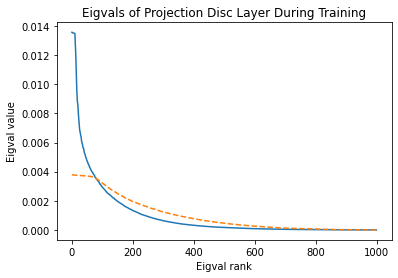

In [8]:
plt.plot(sorted(w / w.sum(), reverse=True) )
plt.plot(sorted(w2 / w2.sum(), reverse=True), linestyle='dashed')
plt.title('Eigvals of Projection Disc Layer During Training')
plt.xlabel('Eigval rank')
plt.ylabel('Eigval value')

In [488]:
w, v = LA.eig(np.matmul(base, base.T))
w3, v = LA.eig(np.matmul(mine, mine.T))

In [522]:
w2, v = LA.eig(np.matmul(base_old, base_old.T))

In [519]:
w4, v = LA.eig(np.matmul(base_mid, base_mid.T))

In [521]:
w5, v = LA.eig(np.matmul(mine_old, mine_old.T))

In [518]:
w6, v = LA.eig(np.matmul(mine_mid, mine_mid.T))

Text(0, 0.5, 'Eigval value')

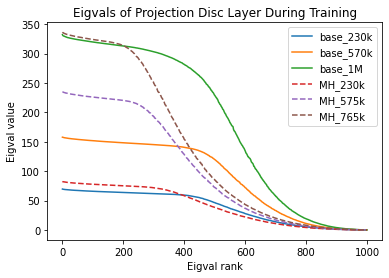

In [505]:
plt.plot(sorted(w2, reverse=True) )
plt.plot(sorted(w4, reverse=True))
plt.plot(sorted(w, reverse=True) )
plt.plot(sorted(w5, reverse=True), linestyle='dashed')
plt.plot(sorted(w6, reverse=True), linestyle='dashed')
plt.plot(sorted(w3, reverse=True), linestyle='dashed')
plt.legend(['base_230k', 'base_570k', 'base_1M', 'MH_230k', 'MH_575k', 'MH_765k'])
plt.title('Eigvals of Projection Disc Layer During Training')
plt.xlabel('Eigval rank')
plt.ylabel('Eigval value')

In [525]:
(w4**2).sum()/(w6**2).sum()
# (w2**2).sum()/(w5**2).sum()

0.6335544

In [508]:
mine = np.load('/scratch0/ilya/locDoc/tfgan/imagenet128_expt_3ctd_bkp795/classification_map_step_765000.npy')
mine_old = np.load('/scratch0/ilya/locDoc/tfgan/imagenet128_expt_1ctd/classification_map_step_230000.npy')
mine_mid = np.load('/scratch0/ilya/locDoc/tfgan/imagenet128_expt_2ctd/classification_map_step_575000.npy')

In [509]:
w5, v = LA.eig(np.matmul(mine_old, mine_old.T))
w6, v = LA.eig(np.matmul(mine_mid, mine_mid.T))
w3, v = LA.eig(np.matmul(mine, mine.T))

Text(0, 0.5, 'Eigval value')

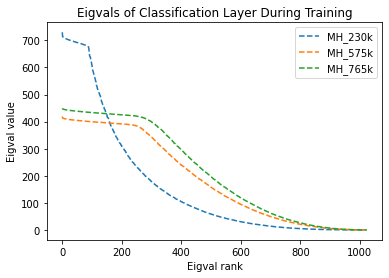

In [511]:

plt.plot(sorted(w5, reverse=True), linestyle='dashed')
plt.plot(sorted(w6, reverse=True), linestyle='dashed')
plt.plot(sorted(w3, reverse=True), linestyle='dashed')
plt.legend(['MH_230k', 'MH_575k', 'MH_765k'])
plt.title('Eigvals of Classification Layer During Training')
plt.xlabel('Eigval rank')
plt.ylabel('Eigval value')

In [418]:
# gradual_npys = sorted(glob.glob('/scratch0/ilya/locDoc/tfgan/imagenet128_baseline_ctd_bkp/*116*.npy'))
gradual_npys = ['/scratch0/ilya/locDoc/tfgan/imagenet64_baseline_ctd/embedding_map_step_999999.npy']
gradual_npys += (sorted(glob.glob('/scratch0/ilya/locDoc/tfgan/imagenet64_baseline_ctd/*100*.npy')))

In [419]:
gradual_npys

['/scratch0/ilya/locDoc/tfgan/imagenet64_baseline_ctd/embedding_map_step_999999.npy',
 '/scratch0/ilya/locDoc/tfgan/imagenet64_baseline_ctd/embedding_map_step_1002499.npy',
 '/scratch0/ilya/locDoc/tfgan/imagenet64_baseline_ctd/embedding_map_step_1004999.npy',
 '/scratch0/ilya/locDoc/tfgan/imagenet64_baseline_ctd/embedding_map_step_1007499.npy',
 '/scratch0/ilya/locDoc/tfgan/imagenet64_baseline_ctd/embedding_map_step_1009999.npy']

In [420]:
legend = []
ws = []
for fname in gradual_npys:
    print('.', end='')
    M = np.load(fname)
    w, _ = LA.eig(np.matmul(M.T, M))
    ws.append(w)



.....

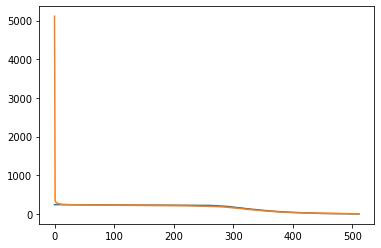

In [471]:
w = ws[0]
plt.plot(sorted(ws[0], reverse=True))
plt.plot(sorted(ws[1], reverse=True))


In [67]:
w1, v1 = LA.eig(np.matmul(low_div.T, low_div))

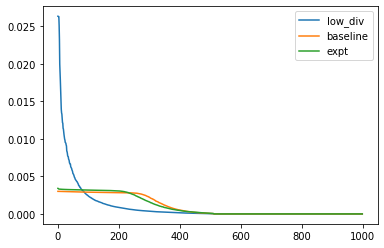

In [391]:
plt.plot(sorted(w1, reverse=True) / w1.sum())
plt.plot(sorted(w, reverse=True) / w.sum())
plt.plot(sorted(w2, reverse=True) / w2.sum())
plt.legend(['low_div', 'baseline', 'expt'])

In [69]:
w, v = LA.eig(np.matmul(baseline.T, baseline))

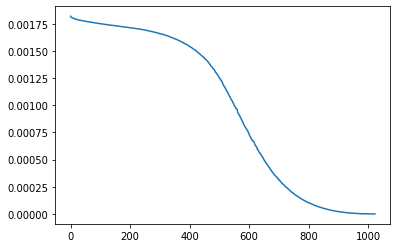

In [74]:
w2, v2 = LA.eig(np.matmul(mine.T, mine))

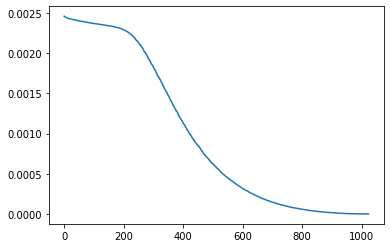

In [371]:
base = np.load('/scratch0/ilya/locDoc/tfgan/imagenet64_baseline/embedding_map_step_999999.npy')
acbase = np.load('/scratch0/ilya/locDoc/tfgan/imagenet64_acbaseline_2step/embedding_map_step_960000.npy')
mine = np.load('/scratch0/ilya/locDoc/tfgan/imagenet64_fixed/embedding_map_step_990000.npy')

In [481]:
base = np.load('/scratch0/ilya/locDoc/tfgan/imagenet64_baseline/classification_map_step_999999.npy')
acbase = np.load('/scratch0/ilya/locDoc/tfgan/imagenet64_acbaseline_2step/classification_map_step_960000.npy')
mine = np.load('/scratch0/ilya/locDoc/tfgan/imagenet64_fixed/classification_map_step_990000.npy')

In [482]:
w, v = LA.eig(np.matmul(base, base.T))

In [483]:
w1, v = LA.eig(np.matmul(acbase, acbase.T))

In [484]:
w2, v = LA.eig(np.matmul(mine, mine.T))

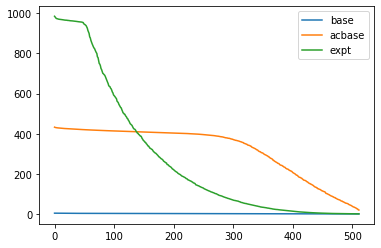

In [485]:
plt.plot(sorted(w, reverse=True) )
plt.plot(sorted(w1, reverse=True) )
plt.plot(sorted(w2, reverse=True) )
plt.legend(['base', 'acbase', 'expt'])

## Single linear layer for classification of Gaussians

In [583]:
from self_attention_estimator import ops
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

In [ ]:
n_samples = 10000
n_features=128
n_class = 100
# X, Y = make_classification(n_samples=n_samples, n_features=128, n_informative=120, n_classes=100)
X, Y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_class, center_box=(-1,1))
Y_one_hot = np.zeros((n_samples, n_class), dtype=np.bool)
Y_one_hot[Y] = 1
# 'delete' some features
idxs = np.arange(n_features)
np.random.shuffle(idxs)
p  = 4 # proportion
X[:,idxs[(n_features//p):]] = np.random.rand(n_samples, n_features - n_features//p)
nval = int(0.2 * n_samples)
Xtrain = X[nval:]
Ytrain = Y[nval:]
Xval = X[:nval]
Yval = Y[:nval]
Y_one_hottrain = Y_one_hot[nval:]
Y_one_hotval = Y_one_hot[:nval]

In [580]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (Xtrain, Ytrain)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((Xval, Yval)).batch(128)

In [600]:


class MyModel(Model):
  def __init__(self, nclass):
    super(MyModel, self).__init__()
    self.nclass = nclass
    self.d2 = Dense(nclass)

  def call(self, x):
    return self.d2(x)
#     return ops.snlinear(x, self.nclass, name='d_sn_linear_class')
model = MyModel(n_class)

In [601]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

In [602]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [603]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [604]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [605]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch + 1,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        test_loss.result(),
                        test_accuracy.result() * 100))

InvalidArgumentError: No OpKernel was registered to support Op 'TPUReplicatedInput' used by node input0 (defined at <ipython-input-23-9e06e1a4bdef>:1) with these attrs: [T=DT_INT32, index=0, is_mirrored_variable=false, N=8]
Registered devices: [CPU, GPU, XLA_CPU, XLA_GPU]
Registered kernels:
  <no registered kernels>

	 [[input0]]

In [527]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification, make_blobs
from scipy.optimize import minimize

In [562]:
def spec_norm_linear_pred_hinge(y_logits, y_true_one_hot, sample_weights=None):
    print(y_logits.shape)
    return ((y_true - y_pred)**2).sum()
    
    
loss_function = spec_norm_linear_pred_hinge

In [563]:
def objective_function(beta, X, Y):
    beta_ = beta.reshape()
    error = loss_function(np.matmul(X,beta), Y)
    return(error)

In [564]:
beta_init = np.random.randn(n_features, n_class).flatten()
result = minimize(objective_function, beta_init, args=(Xtrain,Y_one_hottrain),
                  method='BFGS', options={'maxiter': 2})

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 12800 is different from 128)

In [566]:
beta_init.flatten()

array([ 1.16629353, -0.07035175, -0.32267267, ...,  1.73497951,
        0.0200996 ,  0.07152678])

In [537]:
params.shape

(128,)

In [466]:
# normal sgd
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=100, tol=1e-5, n_jobs=8))
clf.fit(Xtrain, Ytrain)
print('Train acc %.2f' % clf.score(Xtrain, Ytrain))
print('Test acc %.2f' %clf.score(Xval, Yval))

Train acc 0.86
Test acc 0.53


/scratch0/ilya/locDoc/miniconda2/envs/venvtf2p1/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [467]:
A = clf.get_params()['sgdclassifier'].coef_

In [468]:
toyw, v = LA.eig(np.matmul(A.T, A))

/scratch0/ilya/locDoc/miniconda2/envs/venvtf2p1/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


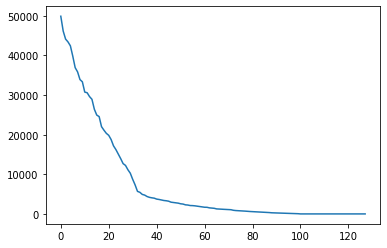

In [606]:
plt.plot(sorted(toyw, reverse=True))

Cant say that as the linear classifier performs better eigenvalues follow a pattern such as high first eigenvalues

In [ ]:
1